<a href="https://colab.research.google.com/github/HVTrieuDuong/Tr-tu-nh-n-t-o-HCMUTE/blob/main/AITuan6_BT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


71.23954404076505


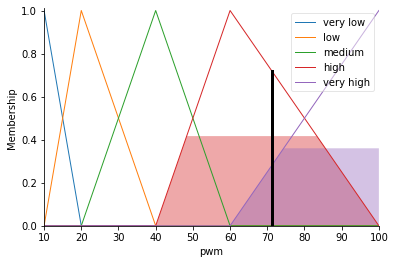

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

setpoint = ctrl.Antecedent(np.arange(0,181,1),'setpoint')
sensor = ctrl.Antecedent(np.arange(0,1001,1),'sensor')
pwm= ctrl.Consequent(np.arange(10,101,1),'pwm')

setpoint['low']= fuzz.trimf(setpoint.universe,[0,0,20])
setpoint['medium'] = fuzz.trimf(setpoint.universe, [0,20,40])
setpoint['high']= fuzz.trimf(setpoint.universe, [20,40,100])

sensor['very low']= fuzz.trimf(sensor.universe,[100,100,300])
sensor['low'] = fuzz.trimf(sensor.universe, [100,300,400])
sensor['medium']= fuzz.trimf(sensor.universe, [300,400,500])
sensor['high']= fuzz.trimf(sensor.universe, [400,500,1000])
sensor['very high']= fuzz.trimf(sensor.universe,[500,1000,1000])

pwm['very low'] = fuzz.trimf(pwm.universe, [10,10,20])
pwm['low'] = fuzz.trimf(pwm.universe,[10,20,40])
pwm['medium'] = fuzz.trimf(pwm.universe,[20,40,60])
pwm['high'] = fuzz.trimf(pwm.universe,[40,60,100])
pwm['very high'] = fuzz.trimf(pwm.universe,[60,100,100])

rule1 = ctrl.Rule(setpoint['low'] & sensor['very low'], pwm['very low'])
rule2 = ctrl.Rule(setpoint['low'] & sensor['low'], pwm['low'])
rule3 = ctrl.Rule(setpoint['low'] & sensor['medium'], pwm['medium'])
rule4 = ctrl.Rule(setpoint['low'] & sensor['high'], pwm['high'])
rule5 = ctrl.Rule(setpoint['low'] & sensor['very high'], pwm['very high'])

rule6 = ctrl.Rule(setpoint['medium'] & sensor['very low'], pwm['very low'])
rule7 = ctrl.Rule(setpoint['medium'] & sensor['low'], pwm['low'])
rule8 = ctrl.Rule(setpoint['medium'] & sensor['medium'], pwm['medium'])
rule9 = ctrl.Rule(setpoint['medium'] & sensor['high'], pwm['high'])
rule10 = ctrl.Rule(setpoint['medium'] & sensor['very high'],pwm['very high'])

rule11 = ctrl.Rule(setpoint['high'] & sensor['very low'], pwm['very low'])
rule12 = ctrl.Rule(setpoint['high'] & sensor['low'], pwm['low'])
rule13 = ctrl.Rule(setpoint['high'] & sensor['medium'], pwm['medium'])
rule14 = ctrl.Rule(setpoint['high'] & sensor['high'], pwm['high'])
rule15 = ctrl.Rule(setpoint['high'] & sensor['very high'], pwm['very high'])
                   
ncpower_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                   rule6, rule7, rule8, rule9, rule10,
                                   rule11, rule12, rule13, rule14, rule15])
ncpower = ctrl.ControlSystemSimulation(ncpower_ctrl)
ncpower.input['setpoint'] = 75
ncpower.input['sensor'] = 680
ncpower.compute()
print(ncpower.output['pwm'])
pwm.view(sim = ncpower)